In [1]:
from numpy.random import normal, uniform
from sklearn.preprocessing import MinMaxScaler
from numpy import array, linspace, savetxt, where, isinf, mean, std, append, array_split, arange, concatenate, vstack, prod, argmin, median, zeros, dot
from scipy.io import loadmat, savemat
from scipy.stats import norm
from math import sqrt, exp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn import metrics
import seaborn as sns
plt.rcParams["figure.figsize"] = [16,8]
sns.set_style("darkgrid")
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from sklearn.mixture import GaussianMixture

# random number generator
from numpy.random import seed, choice
import numpy as np
seed(1)

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
X = boston.data
print(X.shape);

y = boston.target
print(y.shape);

(506, 13)
(506,)


In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X = np.delete(X, obj = [1,3], axis = 1)

In [8]:
X.shape

(506, 11)

In [9]:
X = np.insert(X, -1, y, axis=1)
X.shape

(506, 12)

In [10]:
data_scaler = MinMaxScaler(feature_range = (-1, 1))
data_scaler.fit(X)
X_scaled = data_scaler.transform(X)

In [11]:
X_scaled.shape

(506, 12)

In [12]:
correlation_matrix = np.corrcoef(X.T)

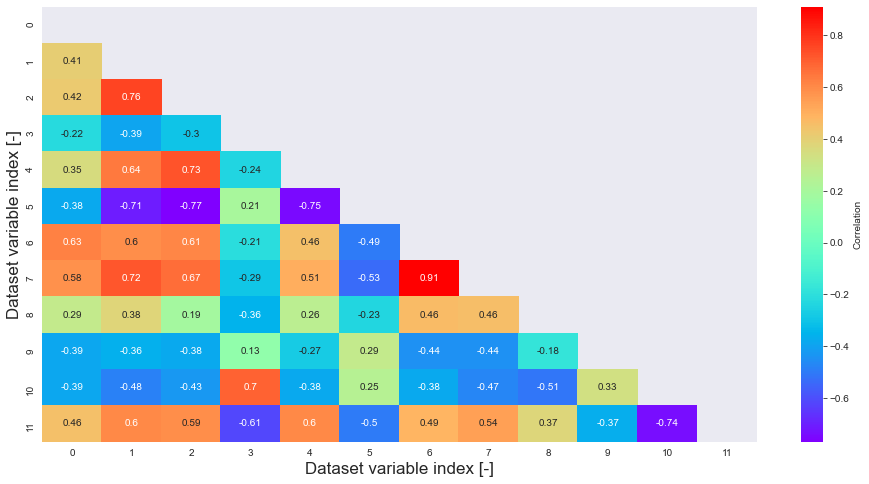

In [13]:
correlation_matrix = np.corrcoef(X.T)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
np.fill_diagonal(mask, True)
ax = sns.heatmap(correlation_matrix, mask = mask, square=False, annot = True, cmap= 'rainbow', cbar_kws={'label': 'Correlation'});
ax.collections[0].colorbar.set_label("Correlation");
plt.ylabel('Dataset variable index [-]', fontsize=17)
plt.xlabel('Dataset variable index [-]', fontsize=17);

In [14]:
original_data_describe = pd.DataFrame(X).describe()
original_data_describe

,0,1,2,3,4,5,6,7,8,9,10,11
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,22.532806,12.653063
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,9.197104,7.141062
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000,1.730000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,17.025000,6.950000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,21.200000,11.360000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,25.000000,16.955000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000,37.970000


In [21]:
mixtures_dict = dict()
samples_dict_scaled = dict()
samples_dict_nonscaled = dict()
ll_dict = dict()

for i in range(1, 16):
    gm = GaussianMixture(n_components = i, random_state = 0).fit(X)
    mixtures_dict[i] = gm
    seed(1)
    samples_dict_scaled[i] = gm.sample(1000)[0]
    samples_dict_nonscaled[i] = data_scaler.inverse_transform(samples_dict_scaled[i])
    ll_dict[i] = gm.score_samples(X)

In [22]:
original_data_describe.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.14,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,22.53,12.65
std,8.60,6.86,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,9.20,7.14
min,0.01,0.46,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,5.00,1.73
25%,0.08,5.19,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,17.02,6.95
50%,0.26,9.69,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,21.20,11.36
75%,3.68,18.10,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,25.00,16.96
max,88.98,27.74,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,50.00,37.97


In [25]:
pd.DataFrame(samples_dict_scaled[3]).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,3.36,11.39,0.56,6.27,69.24,3.77,9.36,410.80,18.50,357.65,22.38,12.75
std,8.35,6.78,0.12,0.68,27.59,2.14,8.55,164.64,2.11,87.33,8.81,6.72
min,-23.29,-8.98,0.25,3.81,-25.05,-2.24,-9.93,95.96,11.21,-105.70,-17.44,-5.77
25%,0.04,6.40,0.47,5.80,49.35,2.09,3.67,287.93,17.09,360.75,15.90,7.90
50%,0.37,11.31,0.54,6.29,73.61,3.35,5.37,352.24,18.81,380.75,22.44,12.53
75%,1.08,17.50,0.63,6.74,90.45,5.31,15.98,578.53,20.19,397.52,28.15,16.53
max,47.43,27.21,1.00,8.29,154.74,10.55,36.91,818.88,24.24,537.55,49.97,36.83


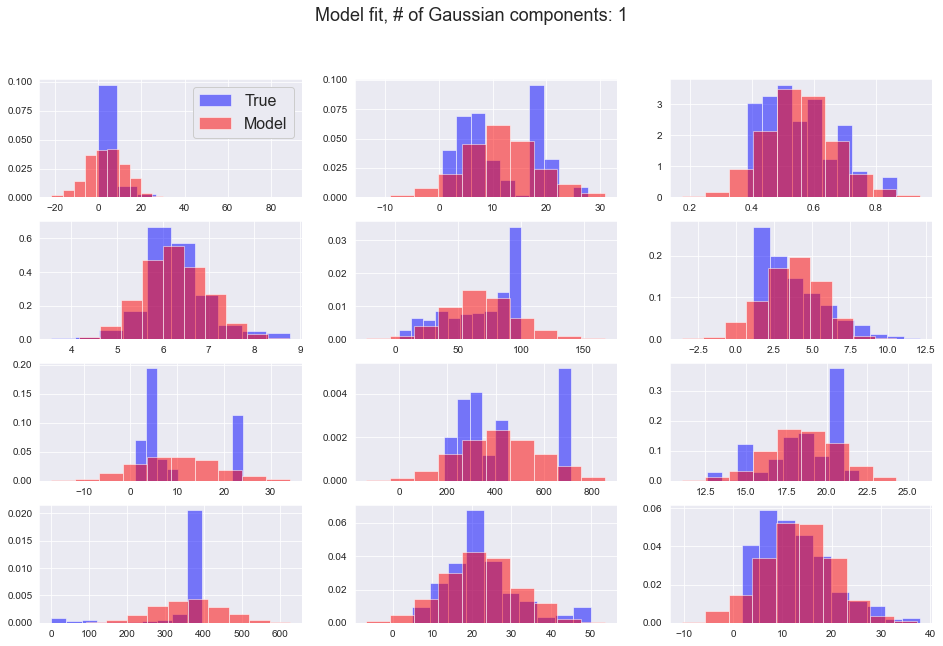

In [27]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(4,3);

ind = 0
fit_ind = 1

for i in range(4):
    for j in range(3):
        axs[i,j].hist(X[:,ind], density = True, color = 'blue', alpha = 0.5, 
                      label = 'True' if i == 0 and j == 0 else None)
        axs[i,j].hist(samples_dict_scaled[fit_ind][:,ind], density = True, color = 'red', alpha = 0.5, 
                      label = 'Model' if i == 0 and j == 0 else None)
        ind += 1
axs[0,0].legend(fontsize=16, framealpha = 1, loc = 'upper right');
fig.suptitle('Model fit, # of Gaussian components: {}'.format(fit_ind), fontsize = 18);

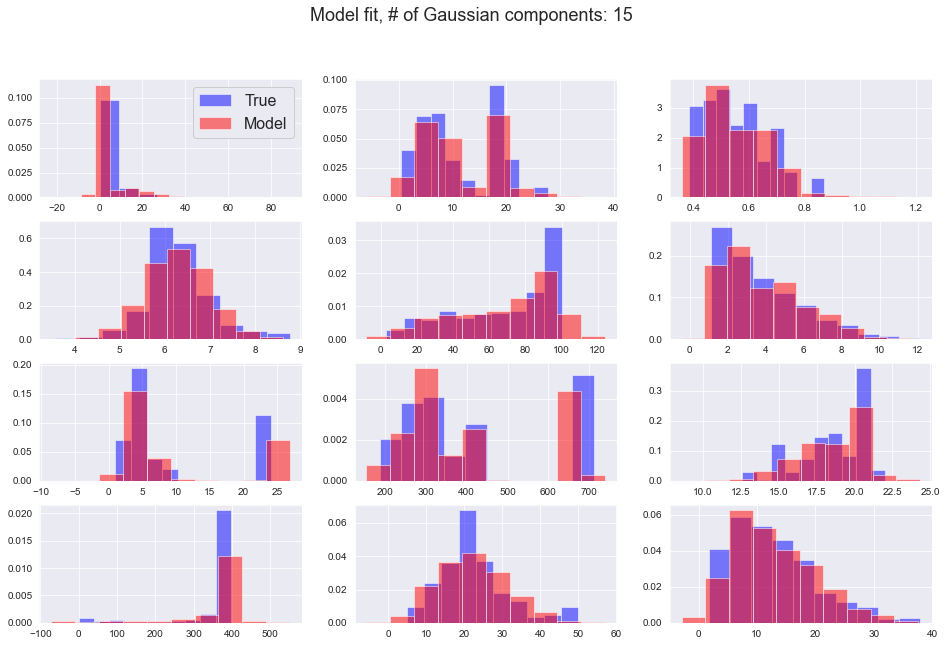

In [28]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(4,3);

ind = 0
fit_ind = 15

for i in range(4):
    for j in range(3):
        axs[i,j].hist(X[:,ind], density = True, color = 'blue', alpha = 0.5, 
                      label = 'True' if i == 0 and j == 0 else None)
        axs[i,j].hist(samples_dict_scaled[fit_ind][:,ind], density = True, color = 'red', alpha = 0.5, 
                      label = 'Model' if i == 0 and j == 0 else None)
        ind += 1
axs[0,0].legend(fontsize=16, framealpha = 1, loc = 'upper right');
fig.suptitle('Model fit, # of Gaussian components: {}'.format(fit_ind), fontsize = 18);

## Gaussian mixtures with different number of components for scaled data

In [29]:
mixtures_dict = dict()
samples_dict_scaled = dict()
samples_dict_nonscaled = dict()
ll_dict_scaled = dict()
aic_data_scaled = dict()
bic_data_scaled = dict()

for i in range(1, 16):
    gm = GaussianMixture(n_components = i, random_state = 0).fit(X_scaled)
    mixtures_dict[i] = gm
    seed(1)
    samples_dict_scaled[i] = gm.sample(1000)[0]
    samples_dict_nonscaled[i] = data_scaler.inverse_transform(samples_dict_scaled[i])
    ll_dict_scaled[i] = gm.score_samples(X_scaled)
    aic_data_scaled[i] = gm.aic(X_scaled)
    bic_data_scaled[i] = gm.bic(X_scaled)

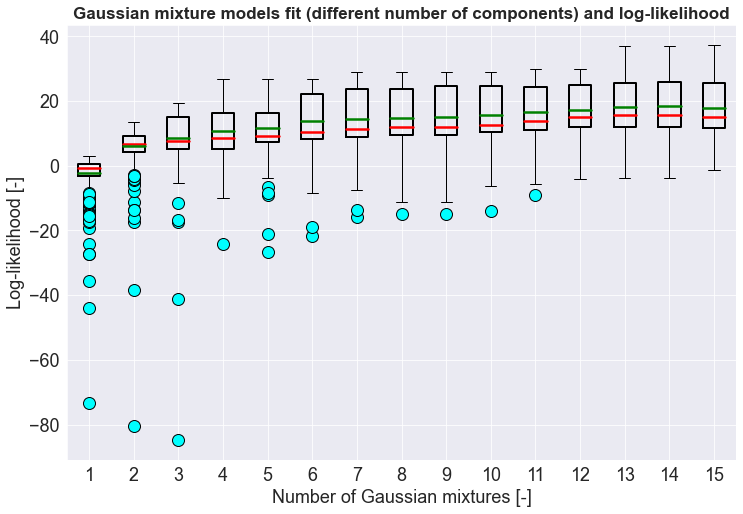

In [90]:
data = pd.DataFrame({x: ll_dict_scaled[x] for x in ll_dict_scaled})
plt.rcParams["figure.figsize"] = [12,8]
plt.boxplot(data, showmeans = True, meanline=True, boxprops = dict(linewidth=2), 
            medianprops = dict(color = 'red', linewidth=2.5), meanprops = dict(linestyle='-', linewidth=2.5, color='green'),
           flierprops = dict(marker='o', markerfacecolor='cyan', linestyle='none', markersize=12))
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel('Log-likelihood [-]', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components) and log-likelihood', fontsize = 17, fontweight = 'bold')
plt.show();
plt.rcParams["figure.figsize"] = [16,8]

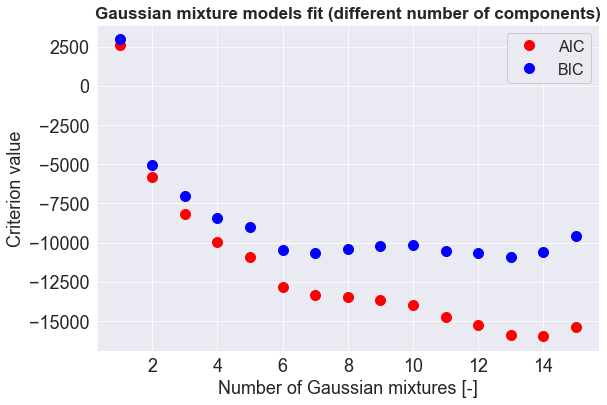

In [31]:
plt.rcParams["figure.figsize"] = [9,6]
plt.plot(range(1,16), [aic_data_scaled[k] for k in aic_data_scaled], 'o', 
         markersize = 10, color = 'red', label = 'AIC')
plt.plot(range(1,16), [bic_data_scaled[k] for k in bic_data_scaled], 'o', 
         markersize = 10, color = 'blue', label = 'BIC')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel('Criterion value', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'upper right');
plt.show();

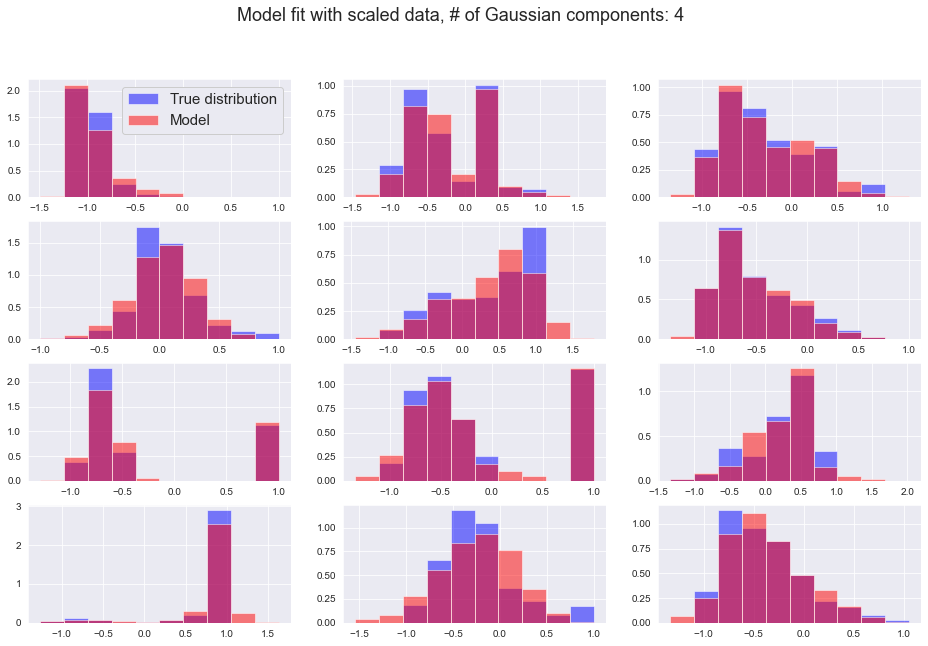

In [32]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(4,3);

ind = 0
fit_ind = 4

for i in range(4):
    for j in range(3):
        bins = np.histogram(np.hstack((X_scaled[:,ind], samples_dict_scaled[fit_ind][:,ind])))[1]
        axs[i,j].hist(X_scaled[:,ind], bins = bins, density = True, color = 'blue', alpha = 0.5, 
                      label = 'True distribution' if i == 0 and j == 0 else None)
        axs[i,j].hist(samples_dict_scaled[fit_ind][:,ind], bins = bins, density = True, color = 'red', alpha = 0.5, 
                      label = 'Model' if i == 0 and j == 0 else None)
        ind += 1
axs[0,0].legend(fontsize=15, framealpha = 1, loc = 'upper right');
fig.suptitle('Model fit with scaled data, # of Gaussian components: {}'.format(fit_ind), fontsize = 18);

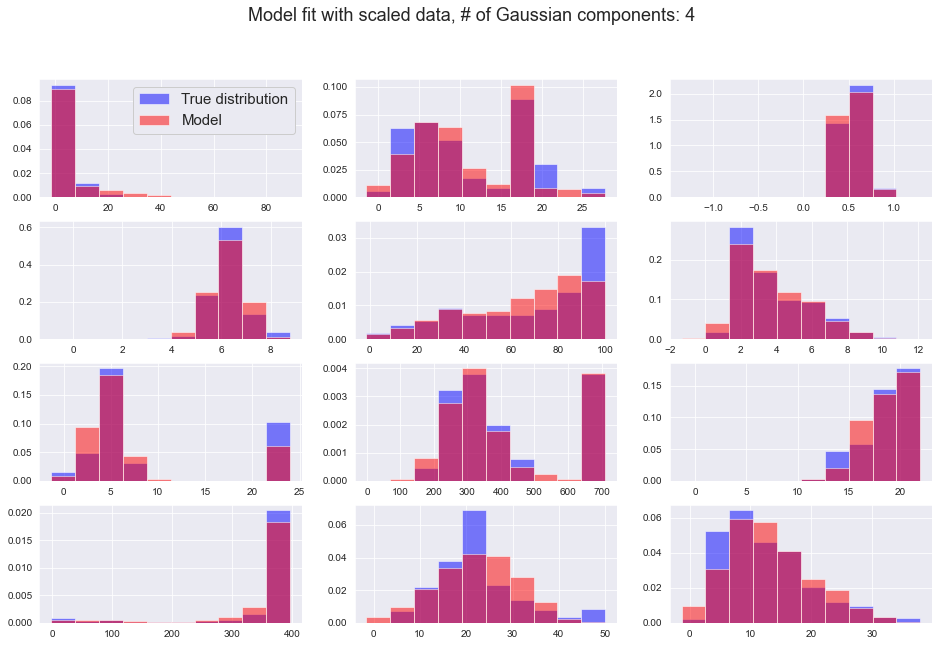

In [33]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(4,3);

ind = 0
fit_ind = 4

for i in range(4):
    for j in range(3):
        original = X[:,ind]
        generated = data_scaler.inverse_transform(samples_dict_scaled[fit_ind])
        bins = np.histogram(np.hstack((original, samples_dict_scaled[fit_ind][:,ind])))[1]
        axs[i,j].hist(original, bins = bins, density = True, color = 'blue', alpha = 0.5, 
                      label = 'True distribution' if i == 0 and j == 0 else None)
        axs[i,j].hist(generated[:,ind], bins = bins, density = True, color = 'red', alpha = 0.5, 
                      label = 'Model' if i == 0 and j == 0 else None)
        ind += 1
axs[0,0].legend(fontsize=15, framealpha = 1, loc = 'upper right');
fig.suptitle('Model fit with scaled data, # of Gaussian components: {}'.format(fit_ind), fontsize = 18);

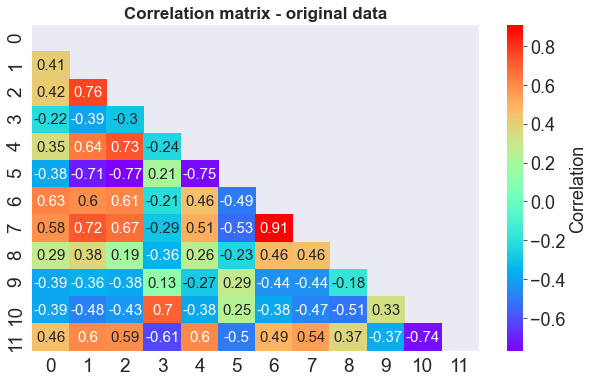

In [51]:
plt.rcParams["figure.figsize"] = [10,6]

correlation_matrix = np.corrcoef(X_scaled.T)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
np.fill_diagonal(mask, True)
ax = sns.heatmap(correlation_matrix, mask = mask, square=False, annot = True, cmap= 'rainbow', 
                 cbar_kws={'label': 'Correlation'}, annot_kws={"size":15});
ax.collections[0].colorbar.set_label("Correlation");
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
ax.figure.axes[-1].yaxis.label.set_size(18)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.title('Correlation matrix - original data', fontsize = 17, fontweight = 'bold');

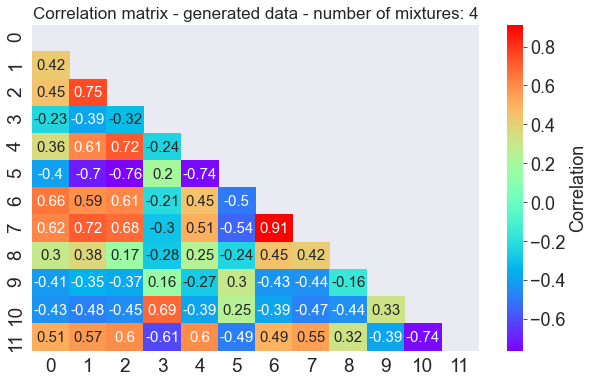

In [53]:
gaussian_mixtures_num = 4

generated_data = data_scaler.inverse_transform(samples_dict_scaled[gaussian_mixtures_num])

correlation_matrix = np.corrcoef(generated_data.T)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
np.fill_diagonal(mask, True)
ax = sns.heatmap(correlation_matrix, mask = mask, square=False, annot = True, cmap= 'rainbow', 
                 cbar_kws={'label': 'Correlation'}, annot_kws={"size":15});
ax.collections[0].colorbar.set_label("Correlation");
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
ax.figure.axes[-1].yaxis.label.set_size(18)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.title('Correlation matrix - generated data - number of mixtures: {}'.format(gaussian_mixtures_num), fontsize = 17);

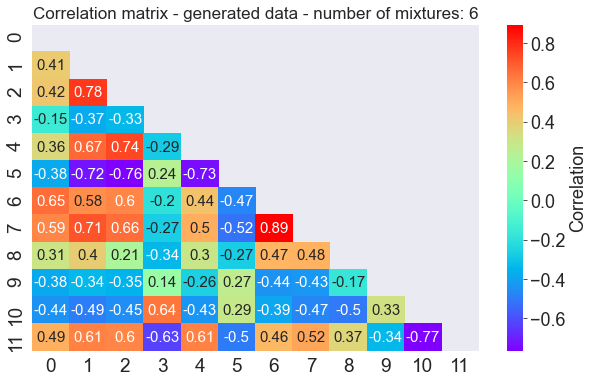

In [54]:
gaussian_mixtures_num = 6

generated_data = data_scaler.inverse_transform(samples_dict_scaled[gaussian_mixtures_num])

correlation_matrix = np.corrcoef(generated_data.T)
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
np.fill_diagonal(mask, True)
ax = sns.heatmap(correlation_matrix, mask = mask, square=False, annot = True, cmap= 'rainbow', 
                 cbar_kws={'label': 'Correlation'}, annot_kws={"size":15});
ax.collections[0].colorbar.set_label("Correlation");
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
ax.figure.axes[-1].yaxis.label.set_size(18)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.title('Correlation matrix - generated data - number of mixtures: {}'.format(gaussian_mixtures_num), fontsize = 17);

In [55]:
samples_dict_scaled[5].shape

(1000, 12)

In [56]:
X_scaled.shape

(506, 12)

In [57]:
from sklearn.cluster import DBSCAN

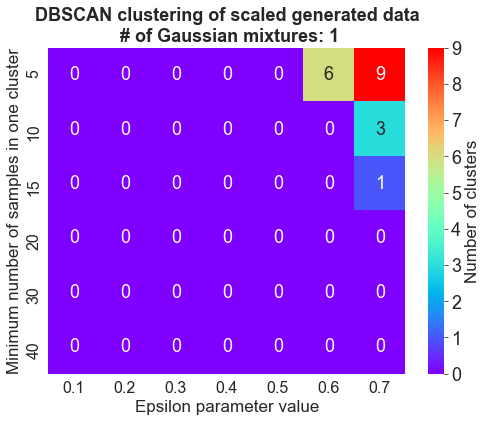

In [58]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

gaussian_mixtures_num = 1

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(samples_dict_scaled[gaussian_mixtures_num])
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled generated data\n # of Gaussian mixtures: {}'.format(gaussian_mixtures_num), 
          fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]

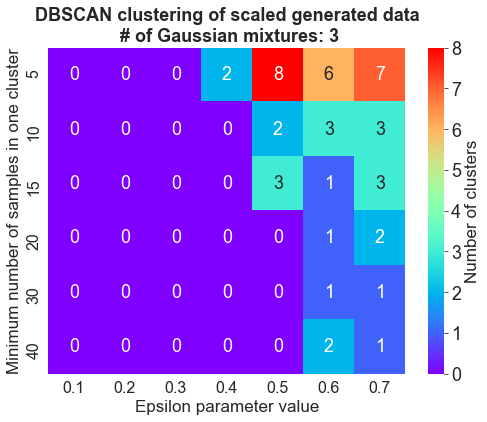

In [59]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

gaussian_mixtures_num = 3

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(samples_dict_scaled[gaussian_mixtures_num])
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled generated data\n # of Gaussian mixtures: {}'.format(gaussian_mixtures_num), 
          fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]

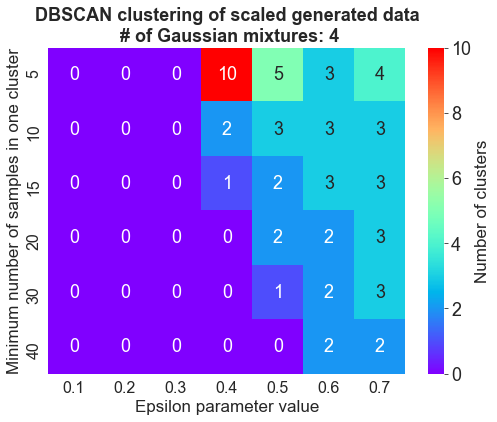

In [60]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

gaussian_mixtures_num = 4

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(samples_dict_scaled[gaussian_mixtures_num])
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled generated data\n # of Gaussian mixtures: {}'.format(gaussian_mixtures_num), 
          fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]

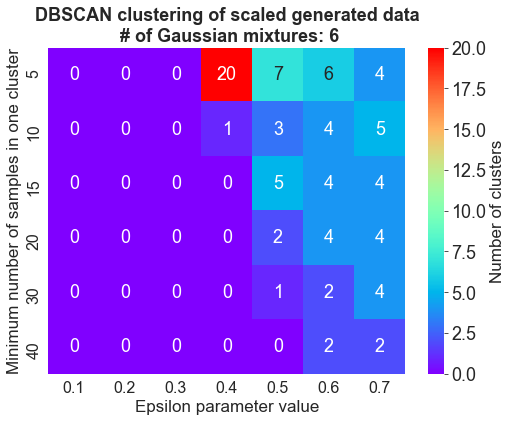

In [61]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

gaussian_mixtures_num = 6

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(samples_dict_scaled[gaussian_mixtures_num])
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled generated data\n # of Gaussian mixtures: {}'.format(gaussian_mixtures_num), 
          fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]

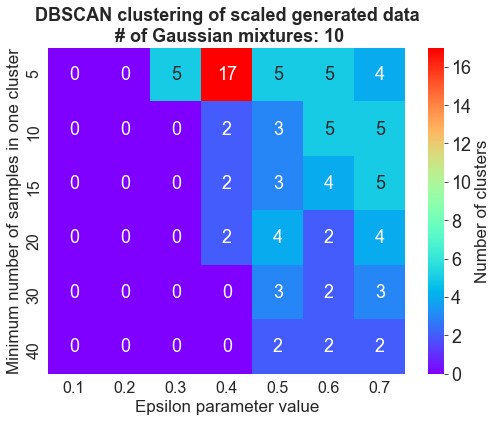

In [62]:
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
samples_values = [5, 10, 15, 20, 30, 40]

clusters_matrix = []

gaussian_mixtures_num = 10

for eps in epsilon_values:
    vector = []
    for min_samples in samples_values:
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(samples_dict_scaled[gaussian_mixtures_num])
        number_od_clusters = max(clustering.labels_) + 1
        vector.append(number_od_clusters)
    clusters_matrix.append(vector)
clusters_matrix = array(clusters_matrix)

plt.rcParams["figure.figsize"] = [8,6]
ax = sns.heatmap(clusters_matrix.T, annot = True, cmap= 'rainbow', 
                 xticklabels = epsilon_values, yticklabels = samples_values,
                 cbar_kws={'label': 'Number of clusters'}, annot_kws={"size":18});
plt.ylabel('Minimum number of samples in one cluster', fontsize=17)
plt.xlabel('Epsilon parameter value', fontsize=17);
plt.tick_params(labelsize=16);
plt.title('DBSCAN clustering of scaled generated data\n # of Gaussian mixtures: {}'.format(gaussian_mixtures_num), 
          fontsize = 18, fontweight = 'bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = 18)
ax.figure.axes[-1].yaxis.label.set_size(17)
plt.rcParams["figure.figsize"] = [16,10]

# Save all generated data

In [243]:
for i in range(1, 16):
    savemat('Boston_generative_modelling/generated data/mixtures_{}_scaled.mat'.format(i), {'mixtures_{}_scaled'.format(i): samples_dict_scaled[i]})
    savemat('Boston_generative_modelling/generated data/mixtures_{}_non_scaled.mat'.format(i), {'mixtures_{}_non_scaled'.format(i): samples_dict_nonscaled[i]})

## Linear regression fitting analysis

In [63]:
train_original_r2 = []
train_original_adjusted_r2 = []
train_original_mse = []

train_generated_r2 = []
train_generated_adjusted_r2 = []
train_generated_mse = []

X = loadmat('boston_dataset_data')['boston_dataset_data']

use_all_generated = False
data_length = 1000 if use_all_generated else len(X)
n_features = X[:,:-1].shape[-1]

for i in range(1, 16):
    # first regression, train on original data, predict/test on generated data
    x_train = X_scaled[:,:-1].copy() # all data components, except for the last column
    y_train = X_scaled[:,-1].copy() # laast column is target variable

    test_data = loadmat('Boston_generative_modelling/generated data/mixtures_{}_non_scaled.mat'.format(i))['mixtures_{}_non_scaled'.format(i)][:data_length]
    test_data_scaled = data_scaler.transform(test_data) # scale generated data
    x_test, y_test = test_data_scaled[:,:-1].copy(), test_data_scaled[:,-1].copy()

    model = LinearRegression().fit(x_train, y_train)
    train_original_mse.append(metrics.mean_squared_error(y_test, model.predict(x_test)))
    r2 = model.score(x_test, y_test)
    train_original_r2.append(r2)
    train_original_adjusted_r2.append(1 - ((1 - r2)*(data_length - 1))/(data_length - n_features - 1))

    # second regression, train on generated data, predict/test on original data
    test_data = loadmat('Boston_generative_modelling/generated data/mixtures_{}_non_scaled.mat'.format(i))['mixtures_{}_non_scaled'.format(i)][:data_length]
    generated_data_scaler = MinMaxScaler(feature_range = (-1, 1))
    generated_data_scaler.fit(test_data)
    generated_data_scaled = generated_data_scaler.transform(test_data)
    original_data_scaled = generated_data_scaler.transform(X)
    x_train, y_train = generated_data_scaled[:,:-1], generated_data_scaled[:,-1]
    x_test, y_test = original_data_scaled[:,:-1], original_data_scaled[:,-1]

    model2 = LinearRegression().fit(x_train, y_train)
    train_generated_mse.append(metrics.mean_squared_error(y_test, model2.predict(x_test)))
    r2 = model2.score(x_test, y_test)
    train_generated_r2.append(r2)
    train_generated_adjusted_r2.append(1 - ((1 - r2)*(data_length - 1))/(data_length - n_features - 1))

train_original_r2 = array(train_original_r2)
train_original_adjusted_r2 = array(train_original_adjusted_r2)
train_original_mse = array(train_original_mse)

train_generated_r2 = array(train_generated_r2)
train_generated_adjusted_r2 = array(train_generated_adjusted_r2)
train_generated_mse = array(train_generated_mse)

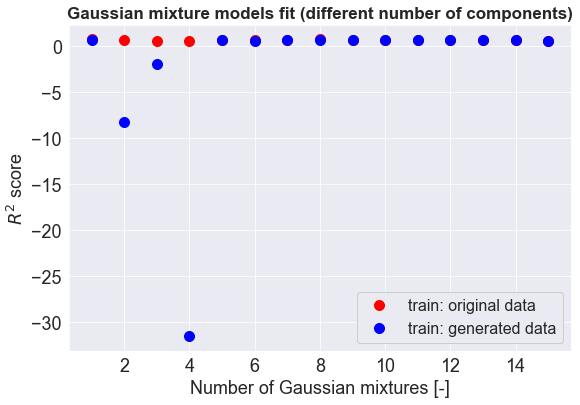

In [64]:
plt.rcParams["figure.figsize"] = [9,6]
plt.plot(range(1,16), train_original_r2, 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(range(1,16), train_generated_r2, 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel(r'$R^2$ score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'best');
plt.show();

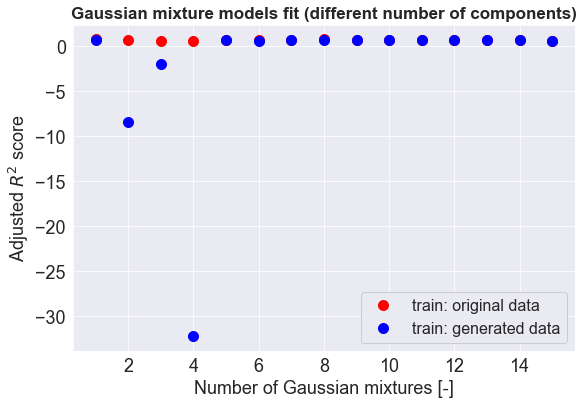

In [65]:
plt.rcParams["figure.figsize"] = [9,6]
plt.plot(range(1,16), train_original_adjusted_r2, 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(range(1,16), train_generated_adjusted_r2, 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel(r'Adjusted $R^2$ score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'best');
plt.show();

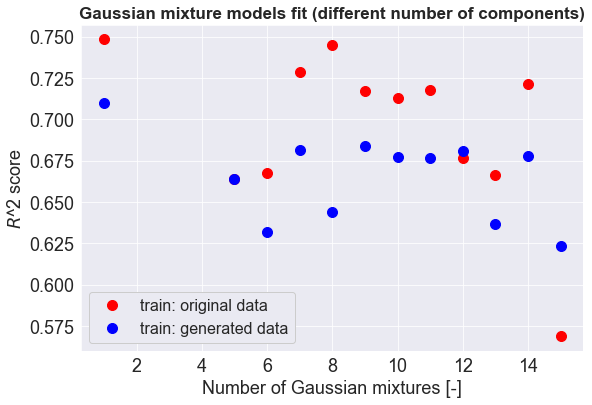

In [66]:
plt.rcParams["figure.figsize"] = [9,6]
indices = where(train_generated_r2 > 0)[0]
plt.plot(array(range(1,16))[indices], train_original_r2[indices], 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(array(range(1,16))[indices], train_generated_r2[indices], 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel(r'$R$^2 score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'lower left');
plt.show();

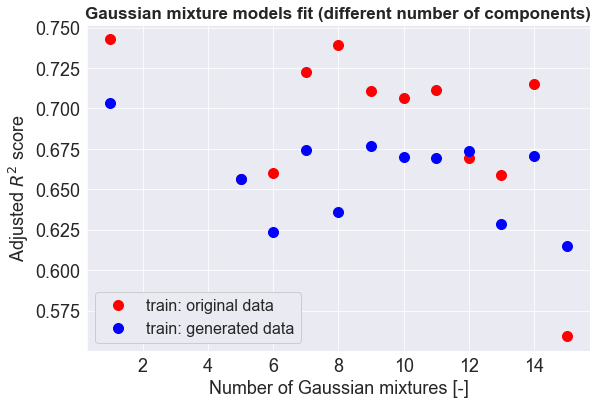

In [67]:
plt.rcParams["figure.figsize"] = [9,6]
indices = where(train_generated_adjusted_r2 > 0)[0]
plt.plot(array(range(1,16))[indices], train_original_adjusted_r2[indices], 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(array(range(1,16))[indices], train_generated_adjusted_r2[indices], 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel(r'Adjusted $R^2$ score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'lower left');
plt.show();

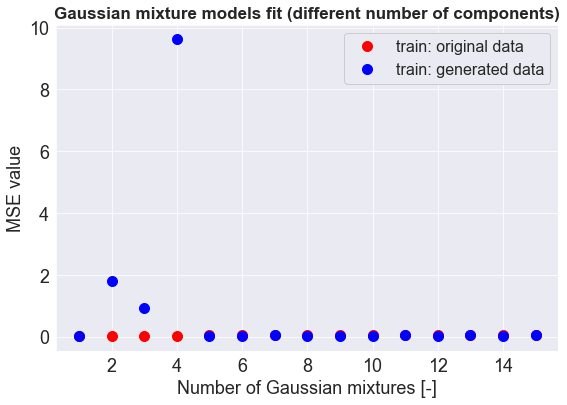

In [68]:
plt.rcParams["figure.figsize"] = [9,6]
plt.plot(range(1,16), train_original_mse, 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(range(1,16), train_generated_mse, 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel('MSE value', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'best');
plt.show();

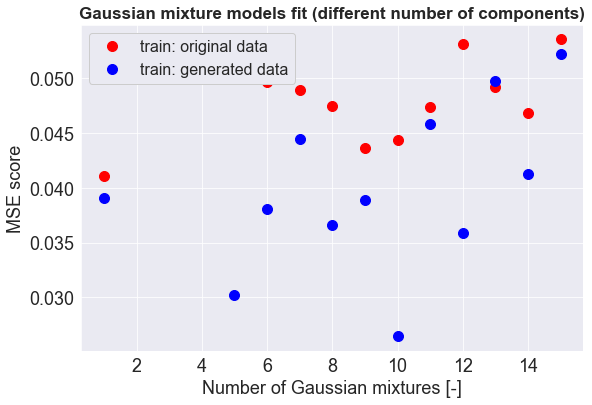

In [69]:
plt.rcParams["figure.figsize"] = [9,6]
indices = where(train_generated_mse < 0.9)[0]
plt.plot(array(range(1,16))[indices], train_original_mse[indices], 'o', markersize = 10, color = 'red', label = 'train: original data')
plt.plot(array(range(1,16))[indices], train_generated_mse[indices], 'o', markersize = 10, color = 'blue', label = 'train: generated data')
plt.xlabel('Number of Gaussian mixtures [-]', fontsize = 18)
plt.ylabel('MSE score', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Gaussian mixture models fit (different number of components)', fontsize = 17, fontweight = 'bold')
plt.legend(fontsize=16, framealpha = 1, loc = 'upper left');
plt.show();

## Closest neighbor of generated data from original data

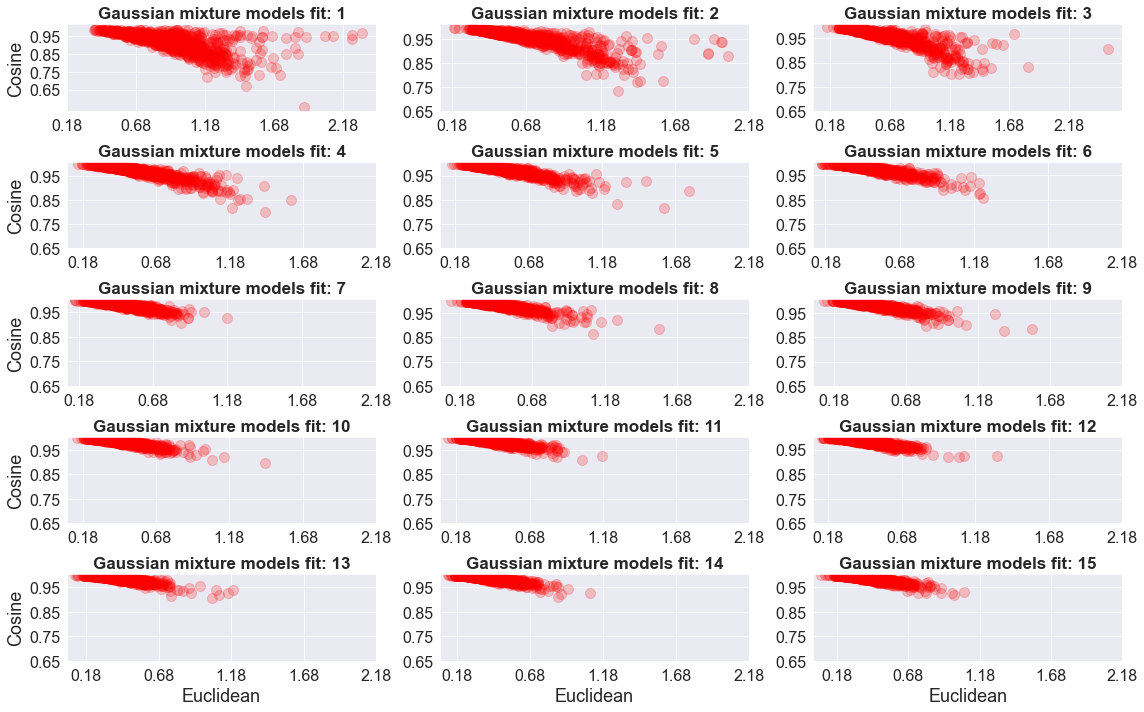

In [70]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(5,3);

ind = 0

for i in range(5):
    for j in range(3):
        gaussian_mixtures_num = ind + 1
        generated_data = loadmat('Boston_generative_modelling/generated data/mixtures_{}_non_scaled.mat'.format(gaussian_mixtures_num))['mixtures_{}_non_scaled'.format(gaussian_mixtures_num)]
        generated_data_scaled = data_scaler.transform(generated_data)

        min_euclidean_distances = []
        max_cosine_distances = []

        for vector in generated_data_scaled:
            euclidean_distances = np.linalg.norm(vector - X_scaled, axis = 1)
            min_euclidean_distances.append(euclidean_distances.min())
            max_cosine_distances.append(metrics.pairwise.cosine_similarity([vector], X_scaled)[0].max())

        axs[i,j].plot(min_euclidean_distances, max_cosine_distances, 'o', alpha = 0.2, markersize = 10, color = 'red')
        axs[i,j].set_xlabel('Euclidean' if i == 4 else None, fontsize = 18)
        axs[i,j].set_ylabel('Cosine' if j == 0 else None, fontsize=18)
        axs[i,j].set_xticks(arange(0.18, 2.6, 0.5))
        axs[i,j].set_yticks(arange(0.65, 1.01, 0.1))
        axs[i,j].tick_params(axis='both', which='major', labelsize=16)
        axs[i,j].set_title('Gaussian mixture models fit: {}'.format(gaussian_mixtures_num), fontsize = 17, fontweight = 'bold')
        ind += 1
fig.tight_layout();

## Closest neighbor of generated data from random data

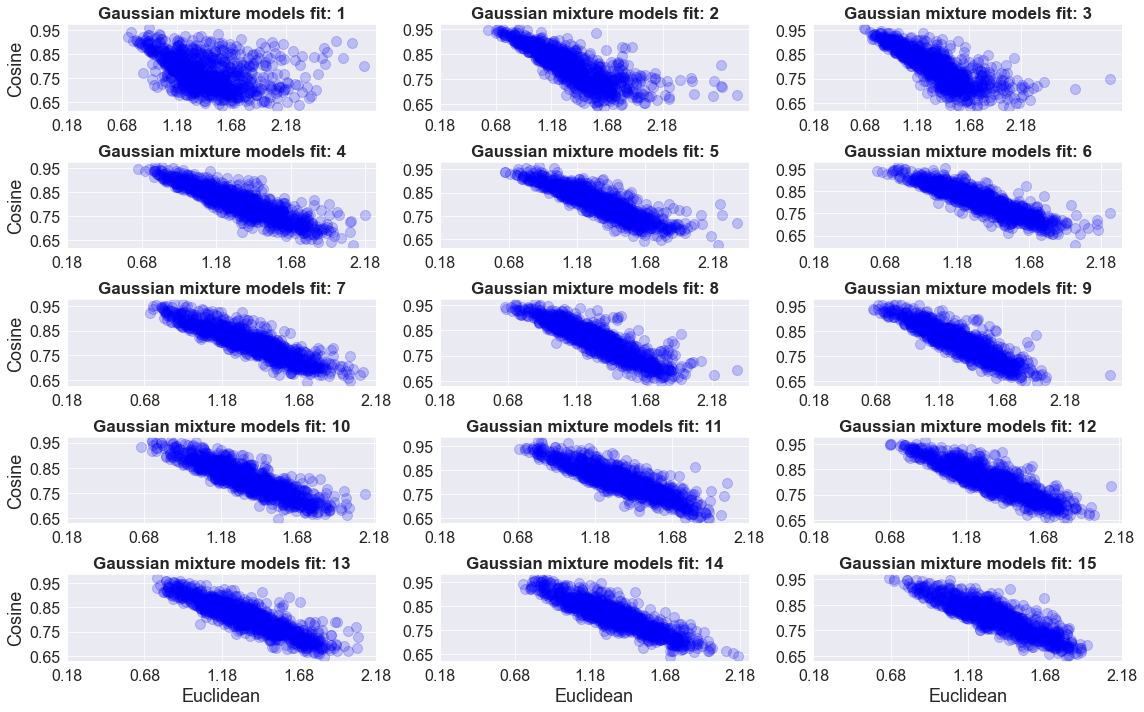

In [72]:
plt.rcParams["figure.figsize"] = [16,10]
fig, axs = plt.subplots(5,3);

ind = 0
seed(1)
random_data = uniform(low = -1, high = 1, size = X_scaled.shape)

for i in range(5):
    for j in range(3):
        gaussian_mixtures_num = ind + 1
        generated_data = loadmat('Boston_generative_modelling/generated data/mixtures_{}_non_scaled.mat'.format(gaussian_mixtures_num))['mixtures_{}_non_scaled'.format(gaussian_mixtures_num)]
        generated_data_scaled = data_scaler.transform(generated_data)

        min_euclidean_distances = []
        max_cosine_distances = []

        for vector in generated_data_scaled:
            euclidean_distances = np.linalg.norm(vector - random_data, axis = 1)
            min_euclidean_distances.append(euclidean_distances.min())
            max_cosine_distances.append(metrics.pairwise.cosine_similarity([vector], random_data)[0].max())

        axs[i,j].plot(min_euclidean_distances, max_cosine_distances, 'o', alpha = 0.2, markersize = 10, color = 'blue')
        axs[i,j].set_xlabel('Euclidean' if i == 4 else None, fontsize = 18)
        axs[i,j].set_ylabel('Cosine' if j == 0 else None, fontsize=18)
        axs[i,j].set_xticks(arange(0.18, 2.6, 0.5))
        axs[i,j].set_yticks(arange(0.65, 1.01, 0.1))
        axs[i,j].tick_params(axis='both', which='major', labelsize=16)
        axs[i,j].set_title('Gaussian mixture models fit: {}'.format(gaussian_mixtures_num), fontsize = 17, fontweight = 'bold')
        ind += 1
fig.tight_layout();

## Closest neighbor of random data from original data

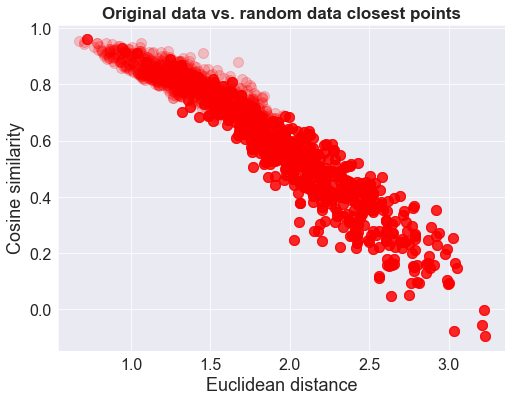

In [410]:
seed(1)
random_data = uniform(low = -1, high = 1, size = X_scaled.shape)

for vector in random_data:
    euclidean_distances = np.linalg.norm(vector - X_scaled, axis = 1)
    min_euclidean_distances.append(euclidean_distances.min())
    max_cosine_distances.append(metrics.pairwise.cosine_similarity([vector], X_scaled)[0].max())

plt.rcParams["figure.figsize"] = [8,6]
plt.plot(min_euclidean_distances, max_cosine_distances, 'o', alpha = 0.2, markersize = 10, color = 'red')
plt.xlabel('Euclidean distance', fontsize = 18)
plt.ylabel('Cosine similarity', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Original data vs. random data closest points', fontsize = 17, fontweight = 'bold');